## More advanced would be to use logistic regression to predict what recipe would be chosen, based on different characteristics of the recipe (its healthiness, the condition, the position in the list).

https://www.geeksforgeeks.org/logistic-regression-using-statsmodels/


https://dl.acm.org/doi/pdf/10.1145/3340631.3394880



In [198]:
import pandas as pd

pd.set_option('display.max_columns', 1000)
pd.set_option('display.max_rows', 1000)

In [199]:
def CustomParser(data):
    import json
    j1 = json.loads(data)
    return j1

shown1 = pd.read_csv("./Pro_1/selectedrecipes.csv", converters={'recipe_order':CustomParser})
shown2 = pd.read_csv("./Pro_2/selectedrecipes.csv", converters={'recipe_order':CustomParser})
shown3 = pd.read_csv("./Pro_3/selectedrecipes.csv", converters={'recipe_order':CustomParser})

# Correct FSA scores
recipes = pd.read_csv("recipes_correct_fsa.csv")

ms = pd.concat([shown1, shown2, shown3])

# Balance data (remove where user_id only selected 2 recipes)
ms = ms[ms['user_id'].map(ms['user_id'].value_counts()) > 2]

In [200]:
anova_df = ms[['user_id', 'fsa_score', 'variant', 'condition', 'who_score', 'nutri_score']]

# Create a new column with names for each label
def label_name (row):
    if row['condition'] == 1 :
        return 'Nutriscore'
    if row['condition'] == 2 :
        return 'MTL'
    if row['condition'] == 3 :
        return 'No-label'

def rank_name (row):
    if row['variant'] == 1 :
        return 'Popular'
    if row['variant'] == 2 :
        return 'Random'
    if row['variant'] == 3 :
        return 'Health'

def numeric_nutriscore (row):
    if row['nutri_score'] == 'A' :
        return 1
    if row['nutri_score'] == 'B' :
        return 2
    if row['nutri_score'] == 'C' :
        return 3
    if row['nutri_score'] == 'D' :
        return 4
    if row['nutri_score'] == 'E' :
        return 5

anova_df['Label'] = anova_df.apply(lambda row: label_name(row), axis=1)
anova_df['Rank'] = anova_df.apply(lambda row: rank_name(row), axis=1)
anova_df['num_nutriscore'] = anova_df.apply(lambda row: numeric_nutriscore(row), axis=1)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pand

In [201]:
rows = ms.to_dict(orient="records")
test_dict = rows[0]

# Create a dataset with one row for each recipe
* Include a column with recipe position (0-19)
* And a column "selected" with 0 or 1 (1=selected)
* Resulting in a dataset with 42560 rows (2128x20)

In [202]:
test_dict['variant']

1

In [203]:
import copy 

#rows =  rows[:5]
upd = []

# Only extract recipe_id, selected, recipe_order_number. 
# Merge recipe_id with other info later
for dict_item in rows:
    for key, value in dict_item["recipe_order"].items():
        new_dict = {}
        if value == dict_item["recipe_id"]:
            new_dict["user_id"] = dict_item["user_id"]
            new_dict["fsa_score"] = dict_item["fsa_score"]
            new_dict["recipe_id"] = dict_item["recipe_id"]
            new_dict["load_more"] = dict_item["load_more"]
            new_dict["condition"] = dict_item["condition"]
            new_dict["query_term"] = dict_item["query_term"]
            new_dict["variant"] = dict_item["variant"]
            new_dict["position"] = key
            new_dict["selected"] = 1
            upd.append(new_dict)
        else: 
            new_dict["user_id"] = dict_item["user_id"]
            new_dict["fsa_score"] = dict_item["fsa_score"]
            new_dict["recipe_id"] = value
            new_dict["load_more"] = dict_item["load_more"]
            new_dict["condition"] = dict_item["condition"]
            new_dict["query_term"] = dict_item["query_term"]
            new_dict["variant"] = dict_item["variant"]
            new_dict["position"] = key
            new_dict["selected"] = 0
            
            upd.append(new_dict)

df = pd.DataFrame(upd)

In [204]:
df.head()

,user_id,fsa_score,recipe_id,load_more,condition,query_term,variant,position,selected
0,318271224575,6,http://allrecipes.com/recipe/scrumptious-chick...,NaN,1,Chicken,1,0,0
1,318271224575,6,http://allrecipes.com/recipe/cheddar-baked-chi...,NaN,1,Chicken,1,1,0
2,318271224575,6,http://allrecipes.com/recipe/restaurant-style-...,NaN,1,Chicken,1,2,0
3,318271224575,6,http://allrecipes.com/recipe/chinese-chicken-s...,NaN,1,Chicken,1,3,0
4,318271224575,6,http://allrecipes.com/recipe/famous-butter-chi...,NaN,1,Chicken,1,4,0


In [205]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41640 entries, 0 to 41639
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     41640 non-null  int64 
 1   fsa_score   41640 non-null  int64 
 2   recipe_id   41640 non-null  object
 3   load_more   8400 non-null   object
 4   condition   41640 non-null  int64 
 5   query_term  41640 non-null  object
 6   variant     41640 non-null  int64 
 7   position    41640 non-null  object
 8   selected    41640 non-null  int64 
dtypes: int64(5), object(4)
memory usage: 2.9+ MB


In [206]:
df['Label'] = df.apply(lambda row: label_name(row), axis=1)
df['Rank'] = df.apply(lambda row: rank_name(row), axis=1)

In [207]:
# Clean "Load_more" column: nan = 0 1 = true

df['load_more'] = df['load_more'].fillna(0)
df['load_more'] = df['load_more'].replace(to_replace = True, value = 1)

# Join on on recipe_id
df = pd.merge(df, recipes, on="recipe_id")
df['recipe_id'] = df['recipe_id'].astype(pd.StringDtype())

In [208]:

"""
def label_name (row):
    if row['condition'] == 1 :
        return 'nutriscore'
    if row['condition'] == 2 :
        return 'MTL'
    if row['condition'] == 3 :
        return 'no-label'

df['label_name'] = df.apply (lambda row: label_name(row), axis=1)

"""# Create a new column with names for each label


"\ndef label_name (row):\n    if row['condition'] == 1 :\n        return 'nutriscore'\n    if row['condition'] == 2 :\n        return 'MTL'\n    if row['condition'] == 3 :\n        return 'no-label'\n\ndf['label_name'] = df.apply (lambda row: label_name(row), axis=1)\n\n"

In [209]:
#df = pd.get_dummies(df, columns=['condition'])

In [210]:
df["position"] = df["position"].astype(int)

In [211]:
# Create unique ID for each list (the same id for each list of 20 recipes): list_id
df['list_id'] = (df['user_id'] * 5) + df['variant']

In [212]:
df.head()

,user_id,fsa_score_x,recipe_id,load_more,condition,query_term,variant,position,selected,Label,Rank,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,recipe_image_link,recipe_name,recipe_description,recipe_servings,recipe_directions,recipe_directions_cnt,recipe_serving,recipe_calories,total_gram_weight,avg_rating,number_of_ratings,kcal_per_100g,protein_per_100g,carbohydrates_per_100g,fat_per_100g,weight_per_serving,weight_per_100,sugar_per_100g,saturated_fat_per_100g,sodium_per_100g,fiber_per_100g,nutri_score,fat_mtl_score,saturated_fat_mtl_score,sugar_mtl,sodium_mtl,fsa_score_y,ingredients,keyword,name,fiberg,sodiumg,carbohydratesg,fatg,proteing,sugarg,saturatedfatg,sizeg,servings,calorieskcal,averagerating,averagesentiment,numberofratings,numberofbookmarks,yearofpublishing,_merge,who_score,list_id
0,318271224575,6,http://allrecipes.com/recipe/scrumptious-chick...,0,1,Chicken,1,0,0,Nutriscore,Popular,49,49,49,http://images.media-allrecipes.com/userphotos/...,Scrumptious Chicken Vegetable Stew,'Low glycemic microwave meal.',6 servings,Place all ingredients in a large microwave-saf...,1,6,360.0,2085.04,4.66667,6,103.595,10.3883,8.20128,3.07908,347.50665,3.475067,1.20861,0.834516,7.596977e-14,3.683383,B,medium,low,low,low,5,"1.boneless, skinless chicken thighs or breasts...",chicken,Scrumptious Chicken Vegetable Stew,12.8,0.26,28.5,10.7,36.099998,4.2,2.9,2085.04,6,360,4.67,2.67,6,173,2004,both in master and using data,5,1591356122876
1,500296607381,6,http://allrecipes.com/recipe/scrumptious-chick...,1,1,Salad,1,4,0,Nutriscore,Popular,49,49,49,http://images.media-allrecipes.com/userphotos/...,Scrumptious Chicken Vegetable Stew,'Low glycemic microwave meal.',6 servings,Place all ingredients in a large microwave-saf...,1,6,360.0,2085.04,4.66667,6,103.595,10.3883,8.20128,3.07908,347.50665,3.475067,1.20861,0.834516,7.596977e-14,3.683383,B,medium,low,low,low,5,"1.boneless, skinless chicken thighs or breasts...",chicken,Scrumptious Chicken Vegetable Stew,12.8,0.26,28.5,10.7,36.099998,4.2,2.9,2085.04,6,360,4.67,2.67,6,173,2004,both in master and using data,5,2501483036906
2,524225988371,6,http://allrecipes.com/recipe/scrumptious-chick...,1,1,Chicken,3,4,0,Nutriscore,Health,49,49,49,http://images.media-allrecipes.com/userphotos/...,Scrumptious Chicken Vegetable Stew,'Low glycemic microwave meal.',6 servings,Place all ingredients in a large microwave-saf...,1,6,360.0,2085.04,4.66667,6,103.595,10.3883,8.20128,3.07908,347.50665,3.475067,1.20861,0.834516,7.596977e-14,3.683383,B,medium,low,low,low,5,"1.boneless, skinless chicken thighs or breasts...",chicken,Scrumptious Chicken Vegetable Stew,12.8,0.26,28.5,10.7,36.099998,4.2,2.9,2085.04,6,360,4.67,2.67,6,173,2004,both in master and using data,5,2621129941858
3,130585107519,6,http://allrecipes.com/recipe/scrumptious-chick...,0,1,Chicken,2,6,0,Nutriscore,Random,49,49,49,http://images.media-allrecipes.com/userphotos/...,Scrumptious Chicken Vegetable Stew,'Low glycemic microwave meal.',6 servings,Place all ingredients in a large microwave-saf...,1,6,360.0,2085.04,4.66667,6,103.595,10.3883,8.20128,3.07908,347.50665,3.475067,1.20861,0.834516,7.596977e-14,3.683383,B,medium,low,low,low,5,"1.boneless, skinless chicken thighs or breasts...",chicken,Scrumptious Chicken Vegetable Stew,12.8,0.26,28.5,10.7,36.099998,4.2,2.9,2085.04,6,360,4.67,2.67,6,173,2004,both in master and using data,5,652925537597
4,1000273510966,6,http://allrecipes.com/recipe/scrumptious-chick...,1,1,Pasta,1,4,0,Nutriscore,Popular,49,49,49,http://images.media-allrecipes.com/userphotos/...,Scrumptious Chicken Vegetable Stew,'Low glycemic microwave meal.',6 servings,Place all ingredients in a large microwave-saf...,1,6,360.0,2085.04,4.66667,6,103.595,10.3883,8.20128,3.07908,347.50665,3.475067,1.20861,0.834516,7.596977e-14,3.683383,B,medium,low,low,low,5,"1.boneless, skinless chicken thighs or breasts...",chicken,Scrumptious Chicken Vegetable Stew,12.8,0.26,28.5,10.7,36.099998,4.2,2.9,2085.04,6,360,4.67,2.67,6,173,2004,both in master and using dat

In [104]:
# Export to CSV
df.to_csv("recipe_list.csv")

# PLOT DISTIBUTION OF SELECTED RECIPE
Did participant select recipes at top or bottom of list?

In [151]:
new_df = df[(df["selected"]==1)]
new_df['position'].describe()

count    2082.000000
mean        7.451969
std         5.649871
min         0.000000
25%         3.000000
50%         6.000000
75%        11.000000
max        19.000000
Name: position, dtype: float64

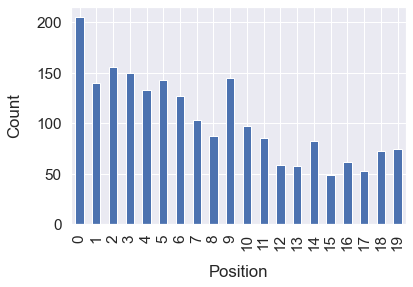

In [152]:
import seaborn as sns
import matplotlib.pyplot as plt

new_df = df[(df["selected"]==1)]

sns.set(font_scale=1.4)

new_df['position'].value_counts().sort_index().plot(kind='bar');
plt.xlabel("Position", labelpad=14)
plt.ylabel("Count", labelpad=14)
plt.show()

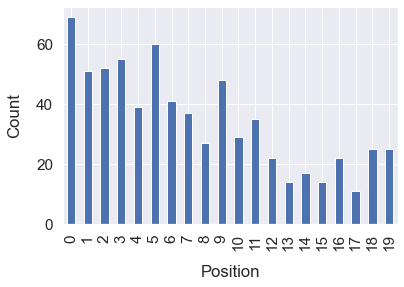

In [153]:
# Cond 1 NUTRISCORE

new_df = df[(df["selected"]==1)  & (df["condition"]==1) ]

sns.set(font_scale=1.4)

new_df['position'].value_counts().sort_index().plot(kind='bar');
plt.xlabel("Position", labelpad=14)
plt.ylabel("Count", labelpad=14)
plt.show()

In [ ]:
# POSITIONS OF DIFFERENT RANKINGS

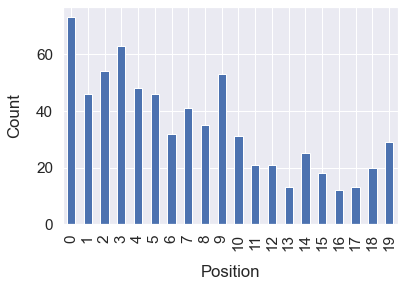

count    694.000000
mean       7.070605
std        5.548623
min        0.000000
25%        3.000000
50%        6.000000
75%       10.000000
max       19.000000
Name: position, dtype: float64


In [169]:
# Popular Ranking
new_df = df[(df["selected"]==1)  & (df["variant"]==1) ]

sns.set(font_scale=1.4)


new_df['position'].value_counts().sort_index().plot(kind='bar');
plt.xlabel("Position", labelpad=14)
plt.ylabel("Count", labelpad=14)
plt.savefig('pop_rank_pos.png')

plt.show()
print(new_df['position'].describe())

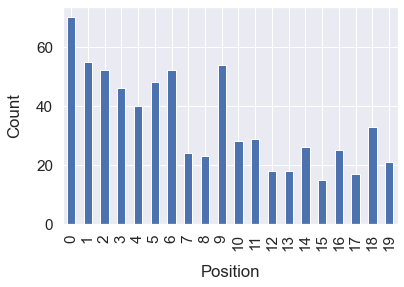

count    694.000000
mean       7.445245
std        5.753651
min        0.000000
25%        2.000000
50%        6.000000
75%       11.000000
max       19.000000
Name: position, dtype: float64


In [168]:
# Random Ranking
new_df = df[(df["selected"]==1)  & (df["variant"]==2) ]

sns.set(font_scale=1.4)

new_df['position'].value_counts().sort_index().plot(kind='bar');
plt.xlabel("Position", labelpad=14)
plt.ylabel("Count", labelpad=14)
plt.savefig('ran_rank_pos.png')

plt.show()

print(new_df['position'].describe())

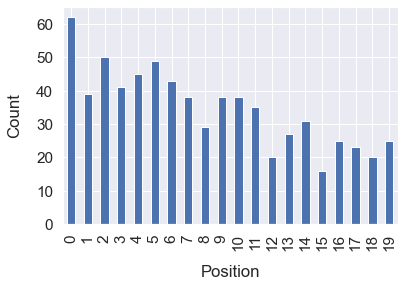

count    694.000000
mean       7.840058
std        5.627346
min        0.000000
25%        3.000000
50%        7.000000
75%       12.000000
max       19.000000
Name: position, dtype: float64


In [167]:
# Health Ranking
new_df = df[(df["selected"]==1)  & (df["variant"]==3) ]

sns.set(font_scale=1.4)

new_df['position'].value_counts().sort_index().plot(kind='bar');
plt.xlabel("Position", labelpad=14)
plt.ylabel("Count", labelpad=14)
plt.savefig('health_rank_pos.png')

plt.show()


print(new_df['position'].describe())

In [ ]:
# 

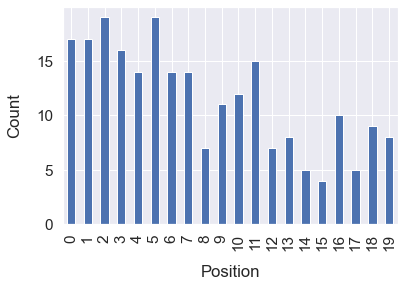

count    40946.000000
mean         9.503053
std          5.767918
min          0.000000
25%          5.000000
50%          9.000000
75%         15.000000
max         19.000000
Name: position, dtype: float64


In [161]:
# Nutriscore health ranking
new_df = df[(df["selected"]==1)  & (df["variant"]==3) & (df["condition"]==1) ]

sns.set(font_scale=1.4)

new_df['position'].value_counts().sort_index().plot(kind='bar');
plt.xlabel("Position", labelpad=14)
plt.ylabel("Count", labelpad=14)
plt.show()

print(df['position'].describe())

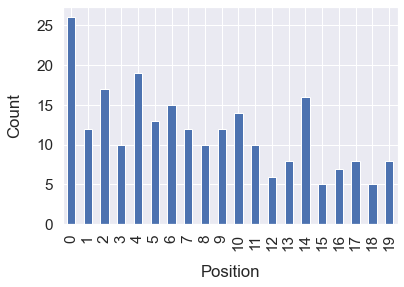

count    40946.000000
mean         9.503053
std          5.767918
min          0.000000
25%          5.000000
50%          9.000000
75%         15.000000
max         19.000000
Name: position, dtype: float64


In [162]:
# MTL health ranking
new_df = df[(df["selected"]==1)  & (df["variant"]==3) & (df["condition"]==2) ]

sns.set(font_scale=1.4)

new_df['position'].value_counts().sort_index().plot(kind='bar');
plt.xlabel("Position", labelpad=14)
plt.ylabel("Count", labelpad=14)
plt.show()

print(df['position'].describe())

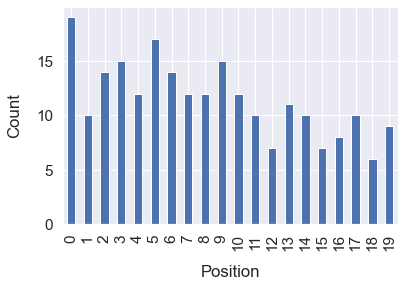

count    40946.000000
mean         9.503053
std          5.767918
min          0.000000
25%          5.000000
50%          9.000000
75%         15.000000
max         19.000000
Name: position, dtype: float64


In [163]:
# No-label health ranking
new_df = df[(df["selected"]==1)  & (df["variant"]==3) & (df["condition"]==3) ]

sns.set(font_scale=1.4)

new_df['position'].value_counts().sort_index().plot(kind='bar');
plt.xlabel("Position", labelpad=14)
plt.ylabel("Count", labelpad=14)
plt.show()

print(df['position'].describe())

# Predict what recipe would be chosen

## Logistic Regression - Univariate

### Get relevant data from dataset

In [185]:
from sklearn.model_selection import train_test_split

X = df[[ "fsa_score_x", "position", "avg_rating", "carbohydrates_per_100g", "kcal_per_100g", "number_of_ratings"]]

y = df["selected"]

# Question for Alain: Should we we split dataset into train and test when runnning regression analysis? 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=0)

In [186]:
# Question for Alain: does it make sense to only include data on the first page? 

# Include only recipes on the first page 
X_first = df.query('position >= 9')

X_fp = X_first[[ "fsa_score_x", "position", "avg_rating", "carbohydrates_per_100g", "kcal_per_100g", "number_of_ratings"]]

y_fp= X_first["selected"]

In [187]:
# selected ~ position

model = sm.GLM.from_formula("selected ~ position", family=sm.families.Binomial(), data=df)
result = model.fit()
result.summary()

NameError: name 'sm' is not defined

In [ ]:
# selected ~ avg_rating

model = sm.GLM.from_formula("selected ~ avg_rating", family=sm.families.Binomial(), data=df)
result = model.fit()
result.summary()

In [603]:
# selected ~ fsa_score

model = sm.GLM.from_formula("selected ~ fsa_score_x", family=sm.families.Binomial(), data=df)
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:               selected   No. Observations:                40946
Model:                            GLM   Df Residuals:                    40944
Model Family:                Binomial   Df Model:                            1
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -8230.3
Date:                Mon, 10 May 2021   Deviance:                       16461.
Time:                        10:57:17   Pearson chi2:                 4.09e+04
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      -2.9288      0.109    -26.896      0.000      -3.142      -2.715
fsa_score_x     0.0003      0.016      0.019      0.985      -0.032       0.033
===============================================================================
"""

In [604]:
# Generalized Linear Models
"""
model = sm.GLM.from_formula("selected ~ fsa_score_x + position + avg_rating + carbohydrates_per_100g + number_of_ratings + kcal_per_100g + fat_per_100g + condition_1 + condition_2 + condition_3", family=sm.families.Binomial(), data=df)
result = model.fit()
result.summary() 
"""

'\nmodel = sm.GLM.from_formula("selected ~ fsa_score_x + position + avg_rating + carbohydrates_per_100g + number_of_ratings + kcal_per_100g + fat_per_100g + condition_1 + condition_2 + condition_3", family=sm.families.Binomial(), data=df)\nresult = model.fit()\nresult.summary() \n'

# Logistic regression  -- Predict selected recipe

In [189]:
X = df[[ "fsa_score_x", "position", "avg_rating", "kcal_per_100g", "number_of_ratings", 'variant' ]]

y = df["selected"]

In [190]:
import statsmodels.api as sm
log_reg = sm.Logit(y, X).fit()

# printing the summary table
print(log_reg.summary())

Optimization terminated successfully.
         Current function value: 0.196388
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:               selected   No. Observations:                40946
Model:                          Logit   Df Residuals:                    40940
Method:                           MLE   Df Model:                            5
Date:                Sat, 15 May 2021   Pseudo R-squ.:                 0.02296
Time:                        10:41:24   Log-Likelihood:                -8041.3
converged:                       True   LL-Null:                       -8230.3
Covariance Type:            nonrobust   LLR p-value:                 1.714e-79
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
fsa_score_x          -0.0136      0.016     -0.854      0.393      -0.045       0.018
position

In [191]:
log_reg = sm.Logit(y, X['position']).fit()

print(log_reg.summary())

Optimization terminated successfully.
         Current function value: 0.267290
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:               selected   No. Observations:                40946
Model:                          Logit   Df Residuals:                    40945
Method:                           MLE   Df Model:                            0
Date:                Sat, 15 May 2021   Pseudo R-squ.:                 -0.3298
Time:                        10:41:29   Log-Likelihood:                -10944.
converged:                       True   LL-Null:                       -8230.3
Covariance Type:            nonrobust   LLR p-value:                       nan
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
position      -0.3259      0.003    -98.761      0.000      -0.332      -0.319


## Condition 1: Nutriscore Predict selected recipe

In [608]:
# Get data from condition 1: Nutriscore
cond = df.loc[df['condition_1'] == 1]

X = cond[[ "fsa_score_x", "position", "avg_rating", "kcal_per_100g", "number_of_ratings"]]

y = cond["selected"]

log_reg = sm.Logit(y, X).fit()

# printing the summary table
print(log_reg.summary())

KeyError: 'condition_1'

## Condition 2: MTL Predict selected recipe

In [609]:
# Get data from condition 1: Nutriscore
cond = df.loc[df['condition_2'] == 1]

X = cond[[ "fsa_score_x", "position", "avg_rating", "kcal_per_100g", "number_of_ratings"]]

y = cond["selected"]

log_reg = sm.Logit(y, X).fit()

# printing the summary table
print(log_reg.summary())

KeyError: 'condition_2'

## Condition 3: No-label Predict selected recipe

In [610]:
# Get data from condition 1: Nutriscore
cond = df.loc[df['condition_3'] == 1]

X = cond[[ "fsa_score_x", "position", "avg_rating", "kcal_per_100g", "number_of_ratings"]]

y = cond["selected"]

log_reg = sm.Logit(y, X).fit()

# printing the summary table
print(log_reg.summary())

KeyError: 'condition_3'

# Logistic regression using pingouin -- Predict selected recipe

In [611]:
import numpy as np
import pandas as pd
import pingouin as pg

In [612]:
lom = pg.logistic_regression(X['position'], y, remove_na=True)
lom.round(2)

,names,coef,se,z,pval,CI[2.5%],CI[97.5%]
0,Intercept,-2.36,0.04,-61.82,0.0,-2.43,-2.28
1,position,-0.07,0.00,-16.43,0.0,-0.07,-0.06


# Multivariate Linear Regression -- FSA = dependent variable

### Get data for Mutivariate Regression Analysis

In [213]:
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt

import statsmodels.api as sm
from statsmodels.stats import diagnostic as diag
from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

%matplotlib inline

In [227]:
# Demographic data
demo1 = pd.read_csv("./Pro_1/demographics.csv")
demo2 = pd.read_csv("./Pro_2/demographics.csv")
demo3 = pd.read_csv("./Pro_3/demographics.csv")
md = pd.concat([demo1, demo2, demo3])

# Add demographic data to dataset
df_demo = pd.merge(df, md, on='user_id', how='left')


df_demo = df_demo[df_demo['age'].notna()]

# Balance data (remove where user_id only selected 2 recipes)
#df_demo = df_demo[df_demo['user_id'].map(df_demo['user_id'].value_counts()) > 2]
#del df_demo['Unnamed: 0']
#del df_demo['Unnamed: 0.1']

In [228]:
# Export selected
df_demo = df_demo.loc[df['selected'] == 1]

In [230]:
# Export to CSV
df_demo.to_csv("recipe_list.csv")

In [229]:
df_demo.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2061 entries, 222 to 40945
Data columns (total 78 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   user_id                  2061 non-null   int64  
 1   fsa_score_x              2061 non-null   int64  
 2   recipe_id                2061 non-null   string 
 3   load_more                2061 non-null   int64  
 4   condition                2061 non-null   int64  
 5   query_term               2061 non-null   object 
 6   variant                  2061 non-null   int64  
 7   position                 2061 non-null   int32  
 8   selected                 2061 non-null   int64  
 9   Label                    2061 non-null   object 
 10  Rank                     2061 non-null   object 
 11  Unnamed: 0_x             2061 non-null   int64  
 12  Unnamed: 0.1_x           2061 non-null   int64  
 13  Unnamed: 0.1.1           2061 non-null   int64  
 14  recipe_image_link    

In [218]:
df_demo.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 40533 entries, 1 to 40945
Data columns (total 78 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   user_id                  40533 non-null  int64  
 1   fsa_score_x              40533 non-null  int64  
 2   recipe_id                40533 non-null  string 
 3   load_more                40533 non-null  int64  
 4   condition                40533 non-null  int64  
 5   query_term               40533 non-null  object 
 6   variant                  40533 non-null  int64  
 7   position                 40533 non-null  int32  
 8   selected                 40533 non-null  int64  
 9   Label                    40533 non-null  object 
 10  Rank                     40533 non-null  object 
 11  Unnamed: 0_x             40533 non-null  int64  
 12  Unnamed: 0.1_x           40533 non-null  int64  
 13  Unnamed: 0.1.1           40533 non-null  int64  
 14  recipe_image_link     

In [195]:
# Process data, turn all values to int

df_demo['experience'] = pd.Categorical(df_demo['experience'])
df_demo['experience_c'] = df_demo['experience'].cat.codes

df_demo['gender'] = pd.Categorical(df_demo['gender'])
df_demo['gender_c'] = df_demo['gender'].cat.codes

df_demo['eating_habits'] = pd.Categorical(df_demo['eating_habits'])
df_demo['eating_habits_c'] = df_demo['eating_habits'].cat.codes

# need to fix this
df_demo['goal'] = pd.Categorical(df_demo['goal'])
df_demo['goal_c'] = df_demo['goal'].cat.codes

#need to fix this
df_demo['restrictions'] = pd.Categorical(df_demo['restrictions'])
df_demo['restrictions_c'] = df_demo['restrictions'].cat.codes

df_demo["continent"] = df_demo["american"] + df_demo["european"] + df_demo["other_continent"]
df_demo["continent"] = df_demo["continent"].str.strip("0")

df_demo['continent'] = pd.Categorical(df_demo['continent'])
df_demo['continent_c'] = df_demo['continent'].cat.codes

In [196]:
# Process data, turn all values to int

# Cooking experience
df_demo = pd.get_dummies(df_demo, columns=['experience'])

# Eating habits
df_demo = pd.get_dummies(df_demo, columns=['eating_habits'])

# American vs. european vs. other
df_demo = pd.get_dummies(df_demo, columns=['continent'])

In [617]:
#df_demo = df_demo.loc[df_demo['selected'] == 1]

In [197]:
df_demo.head()

,user_id,fsa_score_x,recipe_id,load_more,condition,query_term,variant,position,selected,Label,Rank,Unnamed: 0_x,Unnamed: 0.1_x,Unnamed: 0.1.1,recipe_image_link,recipe_name,recipe_description,recipe_servings,recipe_directions,recipe_directions_cnt,recipe_serving,recipe_calories,total_gram_weight,avg_rating,number_of_ratings,kcal_per_100g,protein_per_100g,carbohydrates_per_100g,fat_per_100g,weight_per_serving,weight_per_100,sugar_per_100g,saturated_fat_per_100g,sodium_per_100g,fiber_per_100g,nutri_score,fat_mtl_score,saturated_fat_mtl_score,sugar_mtl,sodium_mtl,fsa_score_y,ingredients,keyword,name,fiberg,sodiumg,carbohydratesg,fatg,proteing,sugarg,saturatedfatg,sizeg,servings,calorieskcal,averagerating,averagesentiment,numberofratings,numberofbookmarks,yearofpublishing,_merge,who_score,list_id,Unnamed: 0_y,Unnamed: 0.1_y,condnum,iso_time,prolific_id,gender,age,nationality,education,goal,restrictions,american,european,other_continent,experience_c,gender_c,eating_habits_c,goal_c,restrictions_c,continent_c,experience_chigh,experience_clow,experience_cmedium,experience_cveryhigh,experience_cverylow,eating_habits_healthy,eating_habits_neutral,eating_habits_unhealthy,eating_habits_vhealhty,eating_habits_vunhealthy,continent_American,continent_European,continent_Other
1,500296607381,6,http://allrecipes.com/recipe/scrumptious-chick...,1,1,Salad,1,4,0,Nutriscore,Popular,49,49,49,http://images.media-allrecipes.com/userphotos/...,Scrumptious Chicken Vegetable Stew,'Low glycemic microwave meal.',6 servings,Place all ingredients in a large microwave-saf...,1,6,360.0,2085.04,4.66667,6,103.595,10.3883,8.20128,3.07908,347.50665,3.475067,1.20861,0.834516,7.596977e-14,3.683383,B,medium,low,low,low,5,"1.boneless, skinless chicken thighs or breasts...",chicken,Scrumptious Chicken Vegetable Stew,12.8,0.26,28.5,10.7,36.099998,4.2,2.9,2085.04,6,360,4.67,2.67,6,173,2004,both in master and using data,5,2501483036906,32.0,33.0,1.0,2021-03-13T13:05:03.299Z,5ee79fdcde87be04391c05be,male,22.0,Polish,2.0,lweight,none,0,European,0,2,1,2,22,26,1,0,0,1,0,0,0,0,1,0,0,0,1,0
2,524225988371,6,http://allrecipes.com/recipe/scrumptious-chick...,1,1,Chicken,3,4,0,Nutriscore,Health,49,49,49,http://images.media-allrecipes.com/userphotos/...,Scrumptious Chicken Vegetable Stew,'Low glycemic microwave meal.',6 servings,Place all ingredients in a large microwave-saf...,1,6,360.0,2085.04,4.66667,6,103.595,10.3883,8.20128,3.07908,347.50665,3.475067,1.20861,0.834516,7.596977e-14,3.683383,B,medium,low,low,low,5,"1.boneless, skinless chicken thighs or breasts...",chicken,Scrumptious Chicken Vegetable Stew,12.8,0.26,28.5,10.7,36.099998,4.2,2.9,2085.04,6,360,4.67,2.67,6,173,2004,both in master and using data,5,2621129941858,33.0,34.0,1.0,2021-03-13T13:05:06.836Z,5e97415e77e78c0779e48c61,male,23.0,Mexican,3.0,lweight,none,0,0,Other,3,1,0,22,26,2,0,0,0,1,0,1,0,0,0,0,0,0,1
3,130585107519,6,http://allrecipes.com/recipe/scrumptious-chick...,0,1,Chicken,2,6,0,Nutriscore,Random,49,49,49,http://images.media-allrecipes.com/userphotos/...,Scrumptious Chicken Vegetable Stew,'Low glycemic microwave meal.',6 servings,Place all ingredients in a large microwave-saf...,1,6,360.0,2085.04,4.66667,6,103.595,10.3883,8.20128,3.07908,347.50665,3.475067,1.20861,0.834516,7.596977e-14,3.683383,B,medium,low,low,low,5,"1.boneless, skinless chicken thighs or breasts...",chicken,Scrumptious Chicken Vegetable Stew,12.8,0.26,28.5,10.7,36.099998,4.2,2.9,2085.04,6,360,4.67,2.67,6,173,2004,both in master and using data,5,652925537597,51.0,53.0,1.0,2021-03-13T13:06:37.252Z,580fa5fddabe780001870af6,female,30.0,Portuguese,3.0,protein,pescatarian,0,European,0,3,0,0,30,27,1,0,0,0,1,0,1,0,0,0,0,0,1,0
4,1000273510966,6,http://allrecipes.com/recipe/scrumptious-chick...,1,1,Pasta,1,4,0,Nutriscore,Popular,49,49,49,http://images.media-allrecipes.com/userphotos/...,Scrumptious Chicken Vegetable Stew,'Low glycemic microwave meal.',6 servings,Place all ingredients in a large microwave-saf...,1,6,360.0,2085.04,4.66667,6,103.595,1

Nice! resultatet blir sånn her. Så tror jeg at den intercept betyr at hvis alle variablene er 0, så vil FSA score være 7.886. Men de coeff tallene på hver variabel tilsvarer endringen i FSA hvis man tilfører en "unit" av den variabelen

## General model -- FSA = dependent variable

In [666]:
import statsmodels.api as sm

# get relevant data
X = df_demo[["gender_c", "age", "education", "experience_c", "eating_habits_c", "position"]]

Y = df_demo["fsa_score_x"]


In [667]:
# define our intput
X2 = sm.add_constant(X)

# create a OLS model
model = sm.OLS(Y, X2)

# fit the data
est = model.fit()
print(est.summary())

#print(est.summary().as_latex())

                            OLS Regression Results                            
Dep. Variable:            fsa_score_x   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                  0.003
Method:                 Least Squares   F-statistic:                     23.05
Date:                Mon, 10 May 2021   Prob (F-statistic):           2.57e-27
Time:                        11:14:43   Log-Likelihood:                -70148.
No. Observations:               40533   AIC:                         1.403e+05
Df Residuals:                   40526   BIC:                         1.404e+05
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               6.2767      0.033    1

In [665]:
# estimate the p-values
est.pvalues

const              0.000000e+00
gender_c           1.136346e-02
age                4.407185e-01
education          2.135378e-14
experience_c       8.995962e-11
eating_habits_c    1.498131e-12
position           7.262353e-01
variant            2.721442e-09
condition          7.164472e-34
dtype: float64

## Condition 1: Nutriscore FSA Multivariate Linear Regression

In [638]:
# get relevant data from condition 1
cond = df_demo.loc[df_demo['condnum'] == 1]

X = cond[["gender_c", "age", "education", "experience_c", "eating_habits_c", "continent_c" ]]

Y = cond["fsa_score_x"]


# define our intput
X2 = sm.add_constant(X)

# create a OLS model
model = sm.OLS(Y, X2)

# fit the data
est = model.fit()
print(est.summary())

                            OLS Regression Results                            
Dep. Variable:            fsa_score_x   R-squared:                       0.012
Model:                            OLS   Adj. R-squared:                  0.011
Method:                 Least Squares   F-statistic:                     26.76
Date:                Mon, 10 May 2021   Prob (F-statistic):           7.12e-32
Time:                        11:00:29   Log-Likelihood:                -23266.
No. Observations:               13511   AIC:                         4.655e+04
Df Residuals:                   13504   BIC:                         4.660e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               6.0530      0.068     

## Condition 2: MTL FSA Multivariate Linear Regression

In [639]:
# get relevant data from condition 2
cond = df_demo.loc[df_demo['condnum'] == 2]

X = cond[["gender_c", "age", "education", "experience_c", "eating_habits_c", "continent_c" ]]

Y = cond["fsa_score_x"]


# define our intput
X2 = sm.add_constant(X)

# create a OLS model
model = sm.OLS(Y, X2)

# fit the data
est = model.fit()
print(est.summary())

                            OLS Regression Results                            
Dep. Variable:            fsa_score_x   R-squared:                       0.010
Model:                            OLS   Adj. R-squared:                  0.009
Method:                 Least Squares   F-statistic:                     21.70
Date:                Mon, 10 May 2021   Prob (F-statistic):           1.56e-25
Time:                        11:00:30   Log-Likelihood:                -23255.
No. Observations:               13570   AIC:                         4.652e+04
Df Residuals:                   13563   BIC:                         4.658e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               6.2666      0.062    1

## Condition 3: No-label FSA Multivariate Linear Regression

In [640]:
# get relevant data from condition 3
cond = df_demo.loc[df_demo['condnum'] == 3]

X = cond[["gender_c", "age", "education", "experience_c", "eating_habits_c", "continent_c" ]]

Y = cond["fsa_score_x"]

# define our intput
X2 = sm.add_constant(X)

# create a OLS model
model = sm.OLS(Y, X2)

# fit the data
est = model.fit()
print(est.summary())

                            OLS Regression Results                            
Dep. Variable:            fsa_score_x   R-squared:                       0.007
Model:                            OLS   Adj. R-squared:                  0.006
Method:                 Least Squares   F-statistic:                     14.86
Date:                Mon, 10 May 2021   Prob (F-statistic):           5.18e-17
Time:                        11:00:32   Log-Likelihood:                -23347.
No. Observations:               13452   AIC:                         4.671e+04
Df Residuals:                   13445   BIC:                         4.676e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               6.5427      0.058    1

# Linear Regression

In [498]:
df

,user_id,fsa_score_x,recipe_id,load_more,query_term,variant,position,selected,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,recipe_image_link,recipe_name,recipe_description,recipe_servings,recipe_directions,recipe_directions_cnt,recipe_serving,recipe_calories,total_gram_weight,avg_rating,number_of_ratings,kcal_per_100g,protein_per_100g,carbohydrates_per_100g,fat_per_100g,weight_per_serving,weight_per_100,sugar_per_100g,saturated_fat_per_100g,sodium_per_100g,fiber_per_100g,nutri_score,fat_mtl_score,saturated_fat_mtl_score,sugar_mtl,sodium_mtl,fsa_score_y,ingredients,keyword,name,fiberg,sodiumg,carbohydratesg,fatg,proteing,sugarg,saturatedfatg,sizeg,servings,calorieskcal,averagerating,averagesentiment,numberofratings,numberofbookmarks,yearofpublishing,_merge,who_score,label_name,condition_1,condition_2,condition_3,list_id
0,318271224575,6,http://allrecipes.com/recipe/scrumptious-chick...,0,Chicken,1,0,0,49,49,49,http://images.media-allrecipes.com/userphotos/...,Scrumptious Chicken Vegetable Stew,'Low glycemic microwave meal.',6 servings,Place all ingredients in a large microwave-saf...,1,6,360.0,2085.04,4.66667,6,103.595,10.3883,8.201280,3.079080,347.50665,3.475067,1.208610,0.834516,7.596977e-14,3.683383,B,medium,low,low,low,5,"1.boneless, skinless chicken thighs or breasts...",chicken,Scrumptious Chicken Vegetable Stew,12.8,0.26,28.5,10.700000,36.099998,4.2,2.900000,2085.04,6,360,4.67,2.67,6,173,2004,both in master and using data,5,nutriscore,1,0,0,1591356122876
1,500296607381,6,http://allrecipes.com/recipe/scrumptious-chick...,1,Salad,1,4,0,49,49,49,http://images.media-allrecipes.com/userphotos/...,Scrumptious Chicken Vegetable Stew,'Low glycemic microwave meal.',6 servings,Place all ingredients in a large microwave-saf...,1,6,360.0,2085.04,4.66667,6,103.595,10.3883,8.201280,3.079080,347.50665,3.475067,1.208610,0.834516,7.596977e-14,3.683383,B,medium,low,low,low,5,"1.boneless, skinless chicken thighs or breasts...",chicken,Scrumptious Chicken Vegetable Stew,12.8,0.26,28.5,10.700000,36.099998,4.2,2.900000,2085.04,6,360,4.67,2.67,6,173,2004,both in master and using data,5,nutriscore,1,0,0,2501483036906
2,524225988371,6,http://allrecipes.com/recipe/scrumptious-chick...,1,Chicken,3,4,0,49,49,49,http://images.media-allrecipes.com/userphotos/...,Scrumptious Chicken Vegetable Stew,'Low glycemic microwave meal.',6 servings,Place all ingredients in a large microwave-saf...,1,6,360.0,2085.04,4.66667,6,103.595,10.3883,8.201280,3.079080,347.50665,3.475067,1.208610,0.834516,7.596977e-14,3.683383,B,medium,low,low,low,5,"1.boneless, skinless chicken thighs or breasts...",chicken,Scrumptious Chicken Vegetable Stew,12.8,0.26,28.5,10.700000,36.099998,4.2,2.900000,2085.04,6,360,4.67,2.67,6,173,2004,both in master and using data,5,nutriscore,1,0,0,2621129941858
3,130585107519,6,http://allrecipes.com/recipe/scrumptious-chick...,0,Chicken,2,6,0,49,49,49,http://images.media-allrecipes.com/userphotos/...,Scrumptious Chicken Vegetable Stew,'Low glycemic microwave meal.',6 servings,Place all ingredients in a large microwave-saf...,1,6,360.0,2085.04,4.66667,6,103.595,10.3883,8.201280,3.079080,347.50665,3.475067,1.208610,0.834516,7.596977e-14,3.683383,B,medium,low,low,low,5,"1.boneless, skinless chicken thighs or breasts...",chicken,Scrumptious Chicken Vegetable Stew,12.8,0.26,28.5,10.700000,36.099998,4.2,2.900000,2085.04,6,360,4.67,2.67,6,173,2004,both in master and using data,5,nutriscore,1,0,0,652925537597
4,1000273510966,6,http://allrecipes.com/recipe/scrumptious-chick...,1,Pasta,1,4,0,49,49,49,http://images.media-allrecipes.com/userphotos/...,Scrumptious Chicken Vegetable Stew,'Low glycemic microwave meal.',6 servings,Place all ingredients in a large microwave-saf...,1,6,360.0,2085.04,4.66667,6,103.595,10.3883,8.201280,3.079080,347.50665,3.475067,1.208610,0.834516,7.596977e-14,3.683383,B,medium,low,low,low,5,"1.boneless, skinless chicken thighs or breasts...",chicken,Scrumptious Chicken Vegetable Stew,12.8,0.26,28.5,10.700000,36.099998,4.2,2.900000,2085.04

In [522]:
sel_df = df.loc[df['selected'] == 1]

In [534]:
formula = 'fsa_score_x ~ Rank + Label + position  + position*Rank '
lm = ols(formula, df).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:            fsa_score_x   R-squared:                       0.009
Model:                            OLS   Adj. R-squared:                  0.009
Method:                 Least Squares   F-statistic:                     54.18
Date:                Thu, 29 Apr 2021   Prob (F-statistic):           1.55e-77
Time:                        17:04:06   Log-Likelihood:                -70760.
No. Observations:               40946   AIC:                         1.415e+05
Df Residuals:                   40938   BIC:                         1.416e+05
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept               

In [523]:
formula = 'fsa_score_x ~ C(Rank) + C(Label) + position + Rank + position*Rank + C(Label):C(Rank) '
lm = ols(formula, sel_df).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:            fsa_score_x   R-squared:                       0.041
Model:                            OLS   Adj. R-squared:                  0.036
Method:                 Least Squares   F-statistic:                     8.139
Date:                Thu, 29 Apr 2021   Prob (F-statistic):           4.41e-14
Time:                        15:04:52   Log-Likelihood:                -3563.0
No. Observations:                2082   AIC:                             7150.
Df Residuals:                    2070   BIC:                             7218.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                                                coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------

In [526]:
formula = 'fsa_score_x ~ C(Rank) + C(Label, Treatment(reference="No-label")) + position + Rank + position*Rank + C(Label):C(Rank) '
lm = ols(formula, sel_df).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:            fsa_score_x   R-squared:                       0.041
Model:                            OLS   Adj. R-squared:                  0.036
Method:                 Least Squares   F-statistic:                     8.139
Date:                Thu, 29 Apr 2021   Prob (F-statistic):           4.41e-14
Time:                        15:11:32   Log-Likelihood:                -3563.0
No. Observations:                2082   AIC:                             7150.
Df Residuals:                    2070   BIC:                             7218.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                                                              coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------

In [528]:
formula = 'fsa_score_x ~ C(Rank, Treatment(reference="Random")) + C(Label) + position + Rank + position*Rank + C(Label):C(Rank) '
lm = ols(formula, sel_df).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:            fsa_score_x   R-squared:                       0.041
Model:                            OLS   Adj. R-squared:                  0.036
Method:                 Least Squares   F-statistic:                     8.139
Date:                Thu, 29 Apr 2021   Prob (F-statistic):           4.41e-14
Time:                        15:12:50   Log-Likelihood:                -3563.0
No. Observations:                2082   AIC:                             7150.
Df Residuals:                    2070   BIC:                             7218.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                                                        coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------

In [ ]:
### Linear regression with No-label and Random rank as baseline

In [468]:
from statsmodels.formula.api import ols
# Condition = Label
# Variant = Ranking
model = ols('fsa_score ~ C(Label, Treatment(reference="No-label")) + C(Rank, Treatment(reference="Random")) + C(Label):C(Rank)', data=anova_df).fit()
aov_table = sm.stats.anova_lm(model, typ=2)


print(model.summary())

                            OLS Regression Results                            
Dep. Variable:              fsa_score   R-squared:                       0.010
Model:                            OLS   Adj. R-squared:                  0.006
Method:                 Least Squares   F-statistic:                     2.581
Date:                Thu, 29 Apr 2021   Prob (F-statistic):            0.00836
Time:                        12:58:49   Log-Likelihood:                -3596.7
No. Observations:                2082   AIC:                             7211.
Df Residuals:                    2073   BIC:                             7262.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                                                              coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------

In [469]:
### Without baseline

# Condition = Label
# Variant = Ranking
model = ols('fsa_score ~ C(Label) + C(Rank) + C(Label):C(Rank)', data=anova_df).fit()
aov_table = sm.stats.anova_lm(model, typ=2)


print(model.summary())

                            OLS Regression Results                            
Dep. Variable:              fsa_score   R-squared:                       0.010
Model:                            OLS   Adj. R-squared:                  0.006
Method:                 Least Squares   F-statistic:                     2.581
Date:                Thu, 29 Apr 2021   Prob (F-statistic):            0.00836
Time:                        13:00:07   Log-Likelihood:                -3596.7
No. Observations:                2082   AIC:                             7211.
Df Residuals:                    2073   BIC:                             7262.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                                                coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------

# Conditional logistic regression

In [455]:
# Create unique ID for each list (the same id for each list of 20 recipes): list_id
df['list_id'] = (df['user_id'] * 2) + df['variant']

In [456]:
# Get data to use for conditional logreg
X = df[[ "user_id", "list_id", "fsa_score_x", "position", "avg_rating", "kcal_per_100g", "number_of_ratings"]]

y = df["selected"]

In [563]:
# Get the data

# Conditional logistic reression
from statsmodels.discrete.conditional_models import ConditionalLogit

log_reg = ConditionalLogit(y, X[["list_id", "fsa_score_x", "position", "avg_rating", "kcal_per_100g", "number_of_ratings"]],groups=X['user_id'] ).fit()

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\discrete\conditional_models.py:337: RuntimeWarning: divide by zero encountered in log
  llg -= np.log(self._denom(grp, params, ofs))
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\discrete\conditional_models.py:348: RuntimeWarning: invalid value encountered in true_divide
  return self._xy[grp] - h / d


KeyboardInterrupt: 

In [ ]:
log_reg.summary()